# 🧪 Virtual Screening with CADD

Welcome, CADDers!  
In this notebook, we will explore how to perform **virtual screening** using multiple drug-likeness and lead optimization criteria. The goal is to filter and prioritize compounds with favorable pharmacokinetic and chemical properties for drug development.

## 🔍 Screening Criteria

We will evaluate compounds using the following key filters:

- **Lipinski's Rule of Five** — To assess oral bioavailability.
- **Quantitative Estimate of Drug-Likeness (QED)** — A score that combines multiple properties into a single drug-likeness metric.
- **Synthetic Accessibility Score (SAscore)** — To estimate the ease of chemical synthesis.
- **PAINS (Pan Assay Interference Compounds)** — To flag problematic substructures that may lead to false positives in screening assays.
- **Tanimoto Similarity** — To measure molecular similarity (e.g., with known active compounds) based on fingerprints.

Let's begin by preparing the necessary tools and datasets.

Assignment 
1. ROV = 0
2. QED = >= 0.67
3. SAScore = <=4
4. PAINS
5. Tanimoto: ref Smiles = "C1=CC2=C(C=CC(=C2))N=C1", 0.3


In [2]:
import pandas as pd
import rdkit 
from rdkit import Chem

In [3]:
df = pd.read_csv("filtered_by_ML_upNext_PAINS.csv")


In [4]:
df

,Names,Smiles,pChEMBL Value,value
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1
1,Decane,CCCCCCCCCC,8.897540,1
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1
3,Decyl pentyl ether,CCCCCCCCCCOCCCCC,8.921342,1
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1
6,"Benzene, 2-ethyl-1,3-dimethyl-",CCC1=C(C=CC=C1C)C,6.917425,1
7,1-Methyl-1-silabenzocyclobutene,C[Si]1CC2=CC=CC=C21,7.279366,1
8,Undecane,CCCCCCCCCCC,8.939741,1
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1


In [5]:
df

,Names,Smiles,pChEMBL Value,value
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1
1,Decane,CCCCCCCCCC,8.897540,1
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1
3,Decyl pentyl ether,CCCCCCCCCCOCCCCC,8.921342,1
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1
6,"Benzene, 2-ethyl-1,3-dimethyl-",CCC1=C(C=CC=C1C)C,6.917425,1
7,1-Methyl-1-silabenzocyclobutene,C[Si]1CC2=CC=CC=C21,7.279366,1
8,Undecane,CCCCCCCCCCC,8.939741,1
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1


In [6]:
df.isna().sum()

Names            0
Smiles           0
pChEMBL Value    0
value            0
dtype: int64

## 💊 Lipinski's Rule of Five

Lipinski's Rule of Five is a widely used guideline in drug discovery to evaluate the **oral bioavailability** of a compound. It helps identify molecules that are more likely to become orally active drugs in humans.

A compound is considered likely to have good oral bioavailability if **no more than one** of the following rules is violated:

- 🔹 **Molecular weight** ≤ 500 Da  
- 🔹 **LogP** (octanol-water partition coefficient) ≤ 5  
- 🔹 **Hydrogen bond donors** (OH and NH groups) ≤ 5  
- 🔹 **Hydrogen bond acceptors** (N and O atoms) ≤ 10  

These rules are not absolute but serve as a **filter to prioritize drug-like molecules** during virtual screening.

> 📌 Note: Compounds that violate multiple rules may still be biologically active but are less likely to be orally bioavailable.



In [7]:
df

,Names,Smiles,pChEMBL Value,value
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1
1,Decane,CCCCCCCCCC,8.897540,1
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1
3,Decyl pentyl ether,CCCCCCCCCCOCCCCC,8.921342,1
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1
6,"Benzene, 2-ethyl-1,3-dimethyl-",CCC1=C(C=CC=C1C)C,6.917425,1
7,1-Methyl-1-silabenzocyclobutene,C[Si]1CC2=CC=CC=C21,7.279366,1
8,Undecane,CCCCCCCCCCC,8.939741,1
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1


In [9]:
df['Mol'] = df['Smiles'].apply(Chem.MolFromSmiles)

In [10]:
df

,Names,Smiles,pChEMBL Value,value,Mol
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
1,Decane,CCCCCCCCCC,8.897540,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
3,Decyl pentyl ether,CCCCCCCCCCOCCCCC,8.921342,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
6,"Benzene, 2-ethyl-1,3-dimethyl-",CCC1=C(C=CC=C1C)C,6.917425,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
7,1-Methyl-1-silabenzocyclobutene,C[Si]1CC2=CC=CC=C21,7.279366,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
8,Undecane,CCCCCCCCCCC,8.939741,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...


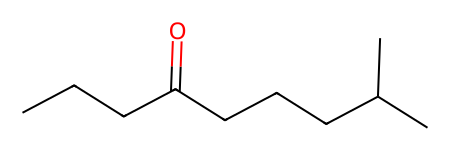

In [11]:
df['Mol'][11]

In [12]:
from rdkit.Chem import Descriptors
from rdkit.Chem.Descriptors import rdMolDescriptors



In [13]:
df.isna().sum()

Names            0
Smiles           0
pChEMBL Value    0
value            0
Mol              0
dtype: int64

In [14]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [15]:
df

,Names,Smiles,pChEMBL Value,value,Mol
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
1,Decane,CCCCCCCCCC,8.897540,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
3,Decyl pentyl ether,CCCCCCCCCCOCCCCC,8.921342,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
6,"Benzene, 2-ethyl-1,3-dimethyl-",CCC1=C(C=CC=C1C)C,6.917425,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
7,1-Methyl-1-silabenzocyclobutene,C[Si]1CC2=CC=CC=C21,7.279366,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
8,Undecane,CCCCCCCCCCC,8.939741,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...


In [16]:
df['MolWt'] = df['Mol'].apply(Descriptors.MolWt)

In [17]:
df

,Names,Smiles,pChEMBL Value,value,Mol,MolWt
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195
1,Decane,CCCCCCCCCC,8.897540,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,142.286
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195
3,Decyl pentyl ether,CCCCCCCCCCOCCCCC,8.921342,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,228.420
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.178
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222
6,"Benzene, 2-ethyl-1,3-dimethyl-",CCC1=C(C=CC=C1C)C,6.917425,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222
7,1-Methyl-1-silabenzocyclobutene,C[Si]1CC2=CC=CC=C21,7.279366,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,133.246
8,Undecane,CCCCCCCCCCC,8.939741,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,156.313
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,154.253


In [18]:
df['LogP'] = df['Mol'].apply(Descriptors.MolLogP)

In [19]:
df['HbondDonors'] = df['Mol'].apply(Descriptors.NumHDonors)

In [20]:
df['HbondAcceptors'] = df['Mol'].apply(Descriptors.NumHAcceptors)

In [21]:
df

,Names,Smiles,pChEMBL Value,value,Mol,MolWt,LogP,HbondDonors,HbondAcceptors
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.55742,0,0
1,Decane,CCCCCCCCCC,8.897540,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,142.286,4.14700,0,0
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.61186,0,0
3,Decyl pentyl ether,CCCCCCCCCCOCCCCC,8.921342,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,228.420,5.33390,0,1
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.178,2.06632,0,1
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.86584,0,0
6,"Benzene, 2-ethyl-1,3-dimethyl-",CCC1=C(C=CC=C1C)C,6.917425,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.86584,0,0
7,1-Methyl-1-silabenzocyclobutene,C[Si]1CC2=CC=CC=C21,7.279366,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,133.246,1.11350,0,0
8,Undecane,CCCCCCCCCCC,8.939741,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,156.313,4.53710,0,0
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,154.253,2.66980,1,1


In [22]:
df_filtered = df[
    (df['MolWt'] <= 500) &
    #(df['MolWt'] >= 200) &
    (df['LogP'] <= 5) &
    (df['HbondDonors'] <= 5) &
    (df['HbondAcceptors'] <= 10)
].copy()


In [23]:
df_filtered.reset_index(inplace=True, drop=True)

In [24]:
df_filtered

,Names,Smiles,pChEMBL Value,value,Mol,MolWt,LogP,HbondDonors,HbondAcceptors
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.55742,0,0
1,Decane,CCCCCCCCCC,8.897540,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,142.286,4.14700,0,0
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.61186,0,0
3,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.178,2.06632,0,1
4,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.86584,0,0
5,"Benzene, 2-ethyl-1,3-dimethyl-",CCC1=C(C=CC=C1C)C,6.917425,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.86584,0,0
6,1-Methyl-1-silabenzocyclobutene,C[Si]1CC2=CC=CC=C21,7.279366,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,133.246,1.11350,0,0
7,Undecane,CCCCCCCCCCC,8.939741,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,156.313,4.53710,0,0
8,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,154.253,2.66980,1,1
9,"Benzene, 1,2,4,5-tetramethyl-",CC1=CC(=C(C=C1C)C)C,6.738000,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.92028,0,0


## 🚫 PAINS (Pan Assay Interference Compounds)

**PAINS** are **Pan Assay Interference Compounds**—molecules that tend to give **false positive results** in biological assays. These compounds interfere with multiple assay types, not through specific biological activity, but through non-specific or reactive mechanisms.

### ⚠️ Why PAINS Are Problematic

- They may appear as "hits" in virtual screening or high-throughput screening campaigns.
- They often interfere with assay readouts due to:
  - Redox cycling
  - Covalent modification of proteins
  - Aggregation
  - Fluorescence interference

Because of this, they can **mislead drug discovery efforts** by diverting time and resources toward compounds with no true pharmacological potential.

### 🔬 How Are PAINS Identified?

PAINS filters use a set of predefined **substructure patterns** (SMARTS) to flag known problematic motifs. These filters were originally developed by Baell and Holloway (2010) after analyzing common assay artifacts.

### 🧪 In Practice

Before advancing any compound, it's good practice to **screen for PAINS** using computational filters (e.g., using RDKit or other cheminformatics tools) and **remove or deprioritize** flagged molecules.

> ✅ Removing PAINS helps improve the quality and reliability of your virtual screening pipeline.



In [29]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.FilterCatalog import *
from rdkit.Chem import Descriptors, Draw, PandasTools

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for class boost::shared_ptr<class RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.


In [30]:
df_filtered

,Names,Smiles,pChEMBL Value,value,Mol,MolWt,LogP,HbondDonors,HbondAcceptors,Qed
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.55742,0,0,0.533979
1,Decane,CCCCCCCCCC,8.897540,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,142.286,4.14700,0,0,0.468409
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.61186,0,0,0.493393
3,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.178,2.06632,0,1,0.535472
4,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.86584,0,0,0.553705
5,"Benzene, 2-ethyl-1,3-dimethyl-",CCC1=C(C=CC=C1C)C,6.917425,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.86584,0,0,0.553705
6,1-Methyl-1-silabenzocyclobutene,C[Si]1CC2=CC=CC=C21,7.279366,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,133.246,1.11350,0,0,0.465110
7,Undecane,CCCCCCCCCCC,8.939741,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,156.313,4.53710,0,0,0.452618
8,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,154.253,2.66980,1,1,0.617129
9,"Benzene, 1,2,4,5-tetramethyl-",CC1=CC(=C(C=C1C)C)C,6.738000,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.92028,0,0,0.511480


In [31]:
#filter by pains
params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)
catalog = FilterCatalog(params)

In [32]:
substructures = pd.read_csv("pains_list_1.csv", sep="\s+")  
substructures["rdkit_molecule"] = substructures.smarts.apply(Chem.MolFromSmarts)
print("Number of unwanted substructures in collection:", len(substructures))

Number of unwanted substructures in collection: 104


In [33]:
substructures


,name,smarts,rdkit_molecule
0,>2EsterGroups,"C(=O)O[C,H1].C(=O)O[C,H1].C(=O)O[C,H1]",<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...
1,2-haloPyridine,"n1c([F,Cl,Br,I])cccc1",<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...
2,acidHalide,"C(=O)[Cl,Br,I,F]",<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...
3,acyclic-C=C-O,C=[C!r]O,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...
4,acylCyanide,N#CC(=O),<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...
...,...,...,...
99,thiol,[SH],<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...
100,Three-membered-heterocycle,"*1[O,S,N]*1",<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...
101,triflate,OS(=O)(=O)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...
102,triphenyl-methylsilyl,"[SiR0,CR0](c1ccccc1)(c2ccccc2)(c3ccccc3)",<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...


In [34]:
from tqdm import tqdm

# search for unwanted substructure
matches = []
clean = []
for index, row in tqdm(df_filtered.iterrows(), total=df_filtered.shape[0]):
    molecule = Chem.MolFromSmiles(row.Smiles)
    match = False
    for _, substructure in substructures.iterrows():
        if molecule.HasSubstructMatch(substructure.rdkit_molecule):
            matches.append(
                {
                    "smiles": row.Smiles,
                    "rdkit_molecule": molecule,
                    "substructure": substructure.rdkit_molecule,
                    "substructure_name": substructure["name"],
                }
            )
            match = True
    if not match:
        clean.append(index)

matches = pd.DataFrame(matches)
df_clean = df.loc[clean]




100%|██████████| 19/19 [00:01<00:00, 16.57it/s]


In [35]:
df_clean

,Names,Smiles,pChEMBL Value,value,Mol,MolWt,LogP,HbondDonors,HbondAcceptors
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.55742,0,0
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.61186,0,0
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.178,2.06632,0,1
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.86584,0,0
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,154.253,2.66980,1,1
10,"Benzene, 1,2,4,5-tetramethyl-",CC1=CC(=C(C=C1C)C)C,6.738000,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.92028,0,0
11,"4-Nonanone, 8-methyl-",CCCC(=O)CCCC(C)C,7.515311,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,156.269,3.18190,0,1


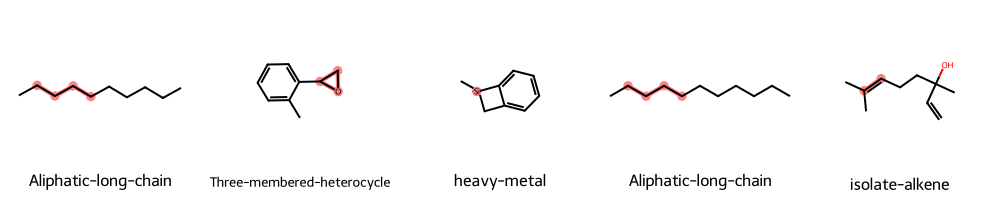

In [36]:
to_highlight = [
    row.rdkit_molecule.GetSubstructMatch(row.substructure) for _, row in matches.head(5).iterrows()
]
Chem.Draw.MolsToGridImage(
    list(matches.head(5).rdkit_molecule), molsPerRow=5,
    highlightAtomLists=to_highlight,
    legends=list(matches.head(5).substructure_name),
)



In [37]:
df_clean

,Names,Smiles,pChEMBL Value,value,Mol,MolWt,LogP,HbondDonors,HbondAcceptors
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.55742,0,0
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.61186,0,0
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.178,2.06632,0,1
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.86584,0,0
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,154.253,2.66980,1,1
10,"Benzene, 1,2,4,5-tetramethyl-",CC1=CC(=C(C=C1C)C)C,6.738000,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.92028,0,0
11,"4-Nonanone, 8-methyl-",CCCC(=O)CCCC(C)C,7.515311,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,156.269,3.18190,0,1


In [38]:
matches

,smiles,rdkit_molecule,substructure,substructure_name
0,CCCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,Aliphatic-long-chain
1,CC1=CC=CC=C1C2CO2,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,Three-membered-heterocycle
2,C[Si]1CC2=CC=CC=C21,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,heavy-metal
3,CCCCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,Aliphatic-long-chain
4,CC(=CCCC(C)(C=C)O)C,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,isolate-alkene
5,C[C@@H]1CC[C@H]([C@H]2[C@]13[C@@H]2C(=C)CC3)C(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,isolate-alkene
6,C[C@@H]1CC[C@H]2[C@@H]1C=C(CC=C2C)C(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,isolate-alkene
7,COC(=O)CCCCCCCC=O,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,aldehyde
8,COC(=O)CCCCCCCC=O,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,Aliphatic-long-chain
9,CC(=CCC/C(=C/CC/C(=C/CO)/C)/C)C,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,isolate-alkene


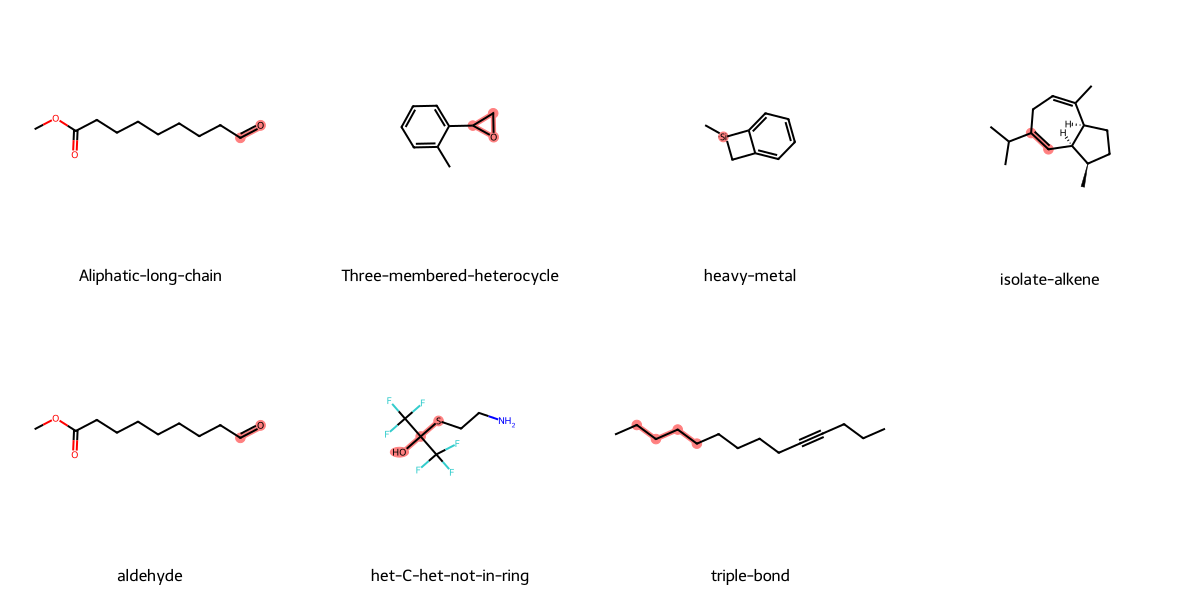

In [39]:

from rdkit.Chem import Draw
from collections import defaultdict
import random

pains_groups = defaultdict(list)

for idx, row in matches.iterrows():
    substructure_name = row['substructure_name']
    smiles = row['smiles']
    pains_groups[substructure_name].append(smiles)

# Step 2: Randomly select one molecule from each PAINS substructure group
selected_smiles = {group: random.choice(smiles_list) for group, smiles_list in pains_groups.items()}

# Step 3: Prepare molecules and highlight PAINS substructures
mols = []
highlight_atoms = []
legends = []

# Iterate through each selected molecule for a PAINS substructure
for pains_group, smiles in selected_smiles.items():
    mol = Chem.MolFromSmiles(smiles)
    mols.append(mol)
    
    # Get substructure match for PAINS
    substructure = matches[matches['smiles'] == smiles]['substructure'].values[0]
    match = mol.GetSubstructMatch(substructure)
    
    # Highlight the atoms in the substructure match
    if match:
        highlight_atoms.append(list(match))
    else:
        highlight_atoms.append([])  # If no match found, append empty list
    
    legends.append(f'{pains_group}')  # Add the group name to the legend

# Step 4: Draw molecules with highlighted PAINS substructures
img = Draw.MolsToGridImage(
    mols, 
    molsPerRow=4,  # 4 molecules per row
    subImgSize=(300, 300),  # Size of each subimage
    highlightAtomLists=highlight_atoms,  # Highlight PAINS substructures
    legends=legends  # Labels for the PAINS groups
)

# Step 5: Display the image
img

In [40]:
matches.drop_duplicates(subset='smiles', inplace=True)

In [41]:
matches

,smiles,rdkit_molecule,substructure,substructure_name
0,CCCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,Aliphatic-long-chain
1,CC1=CC=CC=C1C2CO2,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,Three-membered-heterocycle
2,C[Si]1CC2=CC=CC=C21,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,heavy-metal
3,CCCCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,Aliphatic-long-chain
4,CC(=CCCC(C)(C=C)O)C,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,isolate-alkene
5,C[C@@H]1CC[C@H]([C@H]2[C@]13[C@@H]2C(=C)CC3)C(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,isolate-alkene
6,C[C@@H]1CC[C@H]2[C@@H]1C=C(CC=C2C)C(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,isolate-alkene
7,COC(=O)CCCCCCCC=O,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,aldehyde
9,CC(=CCC/C(=C/CC/C(=C/CO)/C)/C)C,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,isolate-alkene
10,C(CSC(C(F)(F)F)(C(F)(F)F)O)N,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,<rdkit.Chem.rdchem.Mol object at 0x00000237B2D...,het-C-het-not-in-ring


In [42]:
df_clean

,Names,Smiles,pChEMBL Value,value,Mol,MolWt,LogP,HbondDonors,HbondAcceptors
0,"Benzene, 1-ethyl-2-methyl-",CCC1=CC=CC=C1C,6.956566,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.55742,0,0
2,"Benzene, 1,2,4-trimethyl-",CC1=CC(=C(C=C1)C)C,6.760739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,120.195,2.61186,0,0
4,2-Tolyloxirane,CC1=CC=CC=C1C2CO2,7.568739,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.178,2.06632,0,1
5,"Benzene, 4-ethyl-1,2-dimethyl-",CCC1=CC(=C(C=C1)C)C,6.870467,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.86584,0,0
9,Linalool,CC(=CCCC(C)(C=C)O)C,6.608486,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,154.253,2.66980,1,1
10,"Benzene, 1,2,4,5-tetramethyl-",CC1=CC(=C(C=C1C)C)C,6.738000,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,134.222,2.92028,0,0
11,"4-Nonanone, 8-methyl-",CCCC(=O)CCCC(C)C,7.515311,1,<rdkit.Chem.rdchem.Mol object at 0x00000237B23...,156.269,3.18190,0,1


In [44]:
df_clean.to_csv("uda_druglikeness_compds.csv", index=False)